Concept

In this project, I will be analyzing the macrostructure of Homer’s epics, the Iliad and the Odyssey. By employing the distant reading and a basic topic modeling method, we will be able to observe the occurrence of gods in the texts and draw conclusions about these two epics.

As we already know, the main deities ancient Greeks believed in were the twelve Olympians. Each one of the gods had a specific “type” or set of attributes so that, when people prayed to them, they required a blessing somehow related to that specific attribute. For example, a fisherman would pray to Poseidon, the sea-god, before fishing.

My argument is that knowing each god’s attributes and counting how many times they appear in a text, we can identify the underlying micro-narrations that might occur. If Venus, the goddess of love, appears too many times in a text, we can only assume that the text has a lot of ‘love scenes’ and/or tells the story of two lovers or at least the feeling of intimacy in the text is very strong.

Gods’ attributes reminded me of Python elements’ attributes and that is what influenced the idea for the project. The main guide for my research was the basic notion of Object-Oriented Programming, as its concepts reflect the concepts of the real world. An object, (i.e. a god/human/entity etc.), can contain multiple types of data (i.e. his/her identity, features, personality etc.). This approach allows for a multi-layered analysis. 

Methodology

The methodology I used for the project goes as follows:
Firstly, I used web scraping to gather my data. Then, I parsed it and cleaned it to prepare it for my calculations. After that, I created a Python class named God and passed inside all the attributes, e.g. ‘name’, ‘attribute’ etc. and created 12 god instances based on that class. Using these objects, I calculated how many times each god occurs in each text.

In the second part of the project I visualized the findings in order to provide a clear and visually presentable argument. 3 types of graphs were created: A scatterplot, a bar graph and a pie graph.

Transitioning from one epic to another, we notice three things:

1.	God appearances are reduced to half in the Odyssey. Possibly a shift of superstition in people’s minds(?). Or Homer decided to focus more on the human aspect.
2.	Mars shares only 4% of all god appearances in the Odyssey in comparison to an 11% in the Iliad. The former is a more peaceful work than the latter.
3.	Neptune and the elements of nature occupy a larger part in the Odyssey.

Impact & Improvements

This project can be of use to anyone wanting to quickly go through the classical texts. Of course, the scope here is limited. For future improvements I would consider adding more attributes to the God class, as studying personalities can be very complicated. Collocations could also help further understand things like characters’ intentions or even their networks of relations.

## Part 1: Preparation & Calculations

In [1]:
#Firstly, we import our modules. requests, bs4 and nltk for web scraping and text cleaning,
#pandas and matplotlib for data structuring and visualizations.

import requests as re
from bs4 import BeautifulSoup as bs
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

We start by gathering and preparing the data.

In [2]:
url = re.get('https://www.gutenberg.org/files/16452/16452-h/16452-h.htm')
content = url.content
bc = bs(content, 'html.parser')

l = []
for i in bc.find_all('div', {'class': "poem"}):
    clean = i.text
    l.append(clean)
tx = str(l)
book = tx.replace('\\r', ' ').replace('\n', '').replace('“', '').replace('?', '').replace('”', 
            '').replace("'", ' ').replace('\\n',' ').replace(',', '').replace('!', 
            '').replace('.', '').replace('—', ' ').replace(';', '').replace('(', 
           '').replace(')','').replace(':', '').replace('\xa0', '').replace('\\xa0', 
            '').replace('"', '').replace('\\', '').replace("’", ' ').lower()

#Here, we use string slicing to remove excess information that was inside the div tag, e.g. footnotes.
beg = book.find('achilles')
end = book.find('perpetui')
iliad = book[beg:end]

storyname1 = 'Iliad'

'achilles sing o goddess peleus  son  his wrath pernicious who ten thousand woes  caused to achaia s host sent many a soul  illustrious into ades premature  and heroes gave so stood the will of jove5  to dogs and to all ravening fowls a prey  when fierce dispute had separated once  the noble chief achilles from the son  of atreus agamemnon king of men who them to strife impell d what power divine10  latona s son and jove s[1] for he incensed 004  against the king a foul contagion raised  in all the host and multitudes destroy d  for that the son of atreus had his priest  dishonored chryses to the fleet he came15  bearing rich ransom glorious to redeem  his daughter and his hands charged with the wreath  and golden sceptre[2] of the god shaft-arm d his supplication was at large to all  the host of greece but most of all to two20  the sons of atreus highest in command ye gallant chiefs and ye their gallant host  so may the gods who in olympus dwell  give priam s treasures to you for a sp

Now, we create the class God that will serve as our template.

In [3]:
class God:
    def __init__(self, name, attribute, color, x, y):
        self.name = name
        self.attribute = attribute
        self.color = color
        self.x = x
        self.y = y

#These are the 12 Olympians. They have a name, an attribute, a color to be used in the visualizations,
#an x number and a y number. These will be used in the scatterplot later to place their
#abilities in relation to the respective axes.

apollo = God('Apollo', 'Arts', 'gold', 3, 5)
bacchus = God('Bacchus', 'Festivity', 'gray', 4, 4)
ceres = God('Ceres', 'Agriculture', 'green', 1, 3.5)
diana = God('Diana', 'Hunting', 'brown', 1.5, 2.5)
jove = God('Jove', 'Power', 'orange', 3, 3)
juno = God('Juno', 'Marriage', 'purple', 5, 4.5)
mars = God('Mars', 'War', 'red', 2, 1)
mercury = God('Mercury', 'Diplomacy', 'magenta', 4.5, 2.5)
minerva = God('Minerva', 'Wisdom', 'teal', 4, 5)
neptune = God('Neptune', 'Seafaring', 'blue', 1.5, 3)
venus = God('Venus', 'Love', 'pink', 5, 5)
vulcan = God('Vulcan', 'Inventions', 'black', 2, 3.5)

In [4]:
#Here we have 2 string lists and 1 object list. The names are in alphabetical order.

godnames = ['apollo', 'bacchus', 'ceres', 'diana', 'jove', 'juno', 'mars', 'mercury', 'minerva', 
              'neptune', 'venus', 'vulcan']
attributes = ['Arts', 'Festivity', 'Agriculture', 'Hunting', 'Power', 'Marriage', 'War', 'Diplomacy', 'Wisdom', 
             'Seafaring', 'Love', 'Inventions']

gods = [apollo, bacchus, ceres, diana, jove, juno, mars, mercury, minerva, neptune, venus, vulcan]

In [5]:
storywords = nltk.word_tokenize(iliad)

#We create a dictionary and fill it with the gods as keys and their appearances as values.
d = {}
for g in storywords:
    if g in godnames:
        d[g] = d.get(g, 0) + 1
        
#We use the sorted by key function to get equivalence between q and the alphabetically ordered lists above.
q = sorted(d.items(), key = lambda x: x[0])

#Now, we create a simple for loop to only get the values and put them in a new list.
godinstances1 = []
for v, s in q:
    print(v, s)
    godinstances1.append(s)
print(godinstances1)

apollo 94
bacchus 3
ceres 5
diana 11
jove 447
juno 107
mars 101
mercury 15
minerva 46
neptune 54
venus 36
vulcan 36
[94, 3, 5, 11, 447, 107, 101, 15, 46, 54, 36, 36]


We do the same for the Odyssey.

In [6]:
url2 = re.get('https://www.gutenberg.org/files/24269/24269-h/24269-h.htm')
content2 = url2.content
bc2 = bs(content2, 'html.parser')

l2 = []
for f in bc2.find_all('div', {'class': "poem"}):
    clean2 = f.text
    l2.append(clean2)
tx2 = str(l2)
book2 = tx2.replace('\\r', ' ').replace('\n', '').replace('“', '').replace('?', '').replace('”', 
            '').replace("'", '').replace('\\n',' ').replace(',', '').replace('!', 
            '').replace('.', '').replace('—', ' ').replace(';', '').replace('(', 
           '').replace(')','').replace(':', '').replace('\xa0', '').replace('\\xa0', 
            '').replace('"', '').replace('\\', '').replace("’", ' ').lower()
end2 = book2.find('τρίζουσαι')
odyssey = book2[:end2]
storyname2 = 'Odyssey'

'[ muse make the man thy theme for shrewdness famed and genius versatile who far and wide a wand rer after ilium overthrown discover d various cities and the mind and manners learn d of men in lands remote he num rous woes on ocean toss d endured anxious to save himself and to conduct his followers to their home yet all his care preserved them not they perish d self-destroy d by their own fault infatuate who devoured 10 the oxen of the all-o erseeing sun and punish d for that crime return d no more daughter divine of jove these things record as it may please thee even in our ears the rest all those who had perdition  scaped by war or on the deep dwelt now at home him only of his country and his wife alike desirous in her hollow grots calypso goddess beautiful detained wooing him to her arms but when at length 20 many a long year elapsed the year arrived of his return by the decree of heav n to ithaca not even then had he  although surrounded by his people reach d the period of his suff

In [7]:
storywords2 = nltk.word_tokenize(odyssey)
d2 = {}
for g2 in storywords2:
    if g2 in godnames:
        d2[g2] = d2.get(g2, 0) + 1
q2 = sorted(d2.items(), key = lambda x: x[0])
godinstances2 = []
for v, s in q2:
    print(v, s)
    godinstances2.append(s)

print(godinstances2)

apollo 18
bacchus 2
ceres 2
diana 12
jove 221
juno 6
mars 15
mercury 3
minerva 52
neptune 45
venus 7
vulcan 14
[18, 2, 2, 12, 221, 6, 15, 3, 52, 45, 7, 14]


## Part 2: Visualization

In [8]:
#Now, we define our visualizations. We use arguments so that we don't have duplicate code for both texts.

def scatterplot(a, b):
    num = 0
    count = 0
    fig = plt.figure(figsize = (10,10))
    
    while count < 12:
        plt.scatter(gods[num].x, gods[num].y, s = a[num]*4, c =  gods[num].color)
        count += 1
        num += 1
     
    plt.title(b, fontsize = 'x-large')
    plt.xlabel('Technical - Spiritual', fontsize = 'large')
    plt.ylabel('Benevolence', fontsize = 'large')
    plt.legend(attributes, loc = 'best', fontsize = 'medium')
    plt.show()

In [9]:
def bar(a):
    visual = pd.Series(a)
    visual = pd.DataFrame(visual)
    visual.plot.bar(figsize = [10, 6], fontsize = '12', color = 'teal', edgecolor = 'black')

In [10]:
def pie(a, b):
    data = pd.DataFrame({'name': a, 'number': b})
    data.plot.pie('number', labels = data['name'], autopct = "%1.f%%", fontsize = 'large', figsize = (14,14))

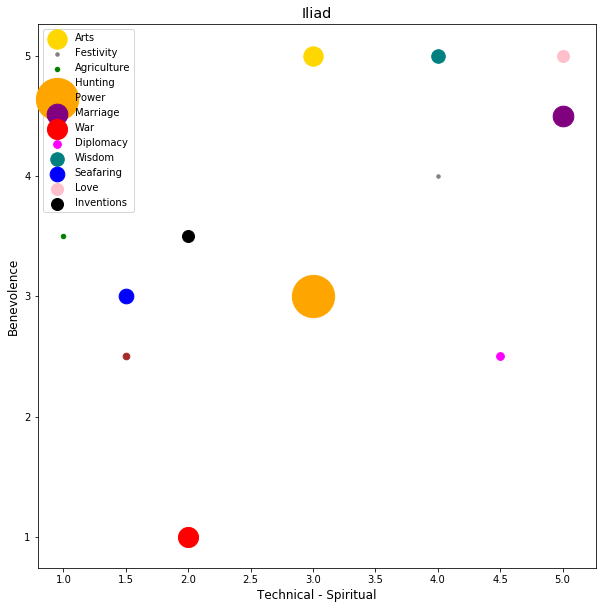

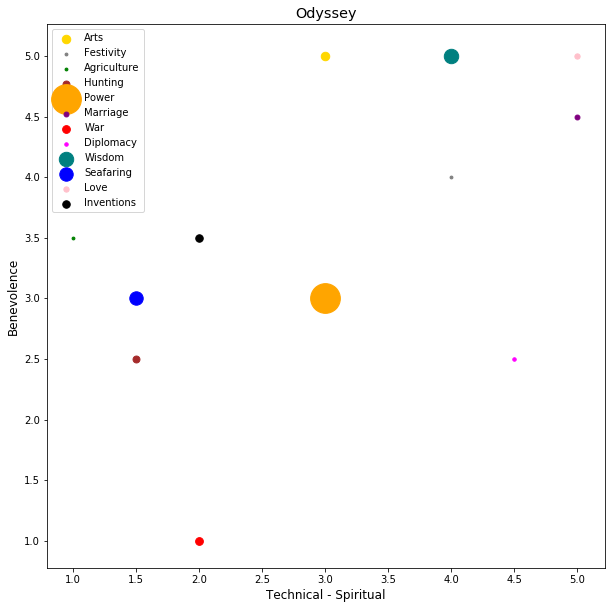

In [11]:
#This graph shows how the gods’ attributes define the story. 
#The more god instances, the bigger the marker spot. 
#X axis ranges from “technical” to “spiritual” and Y axis shows the amount of benevolence of each attribute.

scatterplot(a = godinstances1, b = storyname1)
scatterplot(a = godinstances2, b = storyname2)

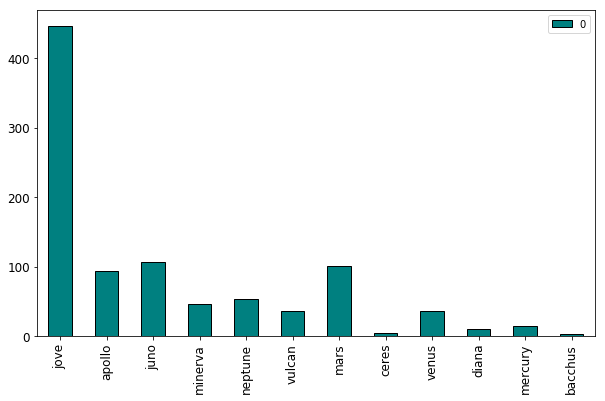

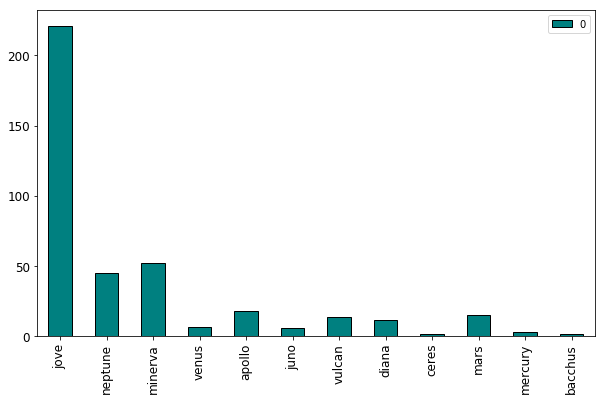

In [12]:
#The bar graph shows the number each god appears.

bar(a = d)
bar(a = d2)

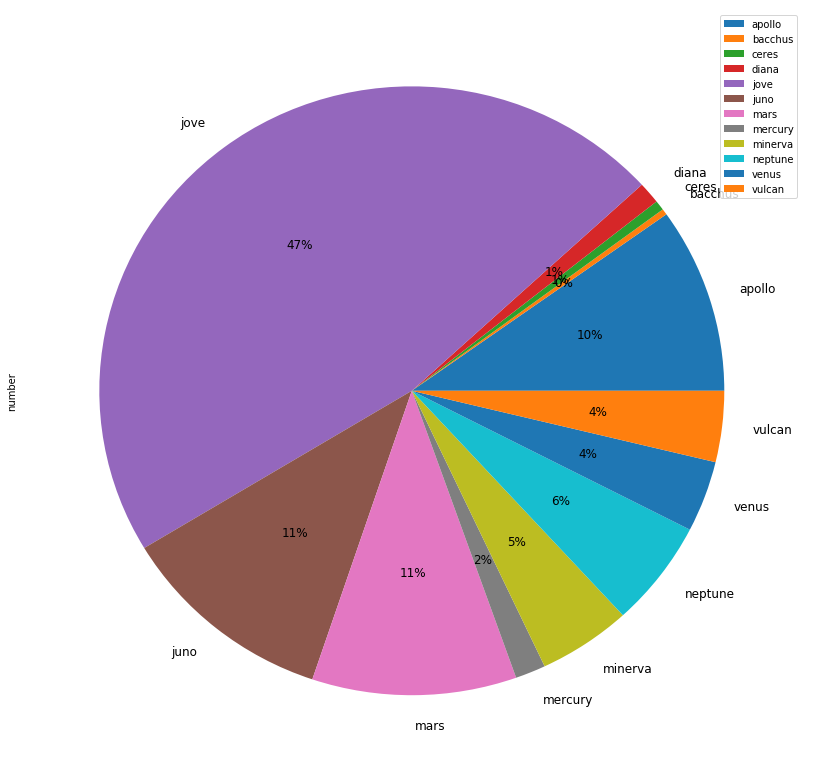

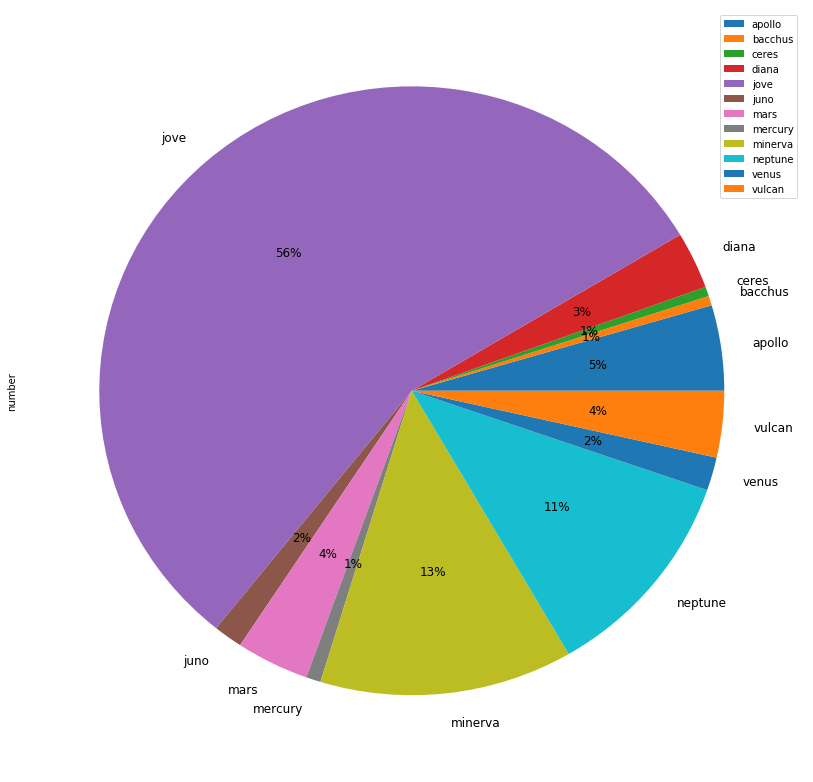

In [13]:
#The pie graph shows their distribution in the story.

pie(a = godnames, b = godinstances1)
pie(a = godnames, b = godinstances2)